In [50]:
!pwd

/home/sai


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
import tensorflow

# Custom activation function
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
from tensorflow.python.keras.utils import generic_utils


def act():
    for i in range(0,3):
        k=random.random()
        if k>=0.3:
            k=0.3
        else:
            k


    k1 = random.randrange(1,9)/100
    
    return k,k1
k,k1=act()
print(k,k1)


# @tensorflow.function
# def custom_activation(x):
#     if x>0:
#         return k+(k1*x)
#     else:
#         k

# @tensorflow.function
# def custom_activation(x):
#     return K.relu(x) if x>0 else k+k1*(K.relu(x))

@tensorflow.function
def custom_activation(x):
    return tensorflow.maximum(x,k+(k1*x))   

get_custom_objects().update({'custom_activation': Activation(custom_activation)})


0.3 0.07


In [2]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
 

In [4]:
data=load_iris()

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data['target']

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X=df.drop('target',axis=1)
y=df['target']

In [8]:
X.shape[1],y.shape

(4, (150,))

In [36]:
y

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
Y_train=pd.get_dummies(y_train)

In [37]:
Y_train

In [12]:
Y_test=pd.get_dummies(y_test)

In [35]:
Y_test

In [15]:
model=Sequential()
model.add(Dense(8,activation=custom_activation,input_shape=(4,)))
model.add(Dense(10,activation=custom_activation))
model.add(Dense(10,activation=custom_activation))
model.add(Dense(10,activation=custom_activation))
model.add(Dense(3,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
train_history=model.fit(x_train,Y_train,epochs=100,validation_data=(x_test,Y_test))

Epoch 1/100
4/4 [==============================] - 1s 118ms/step - loss: 1.3972 - accuracy: 0.3333 - val_loss: 1.3074 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 1.3298 - accuracy: 0.3333 - val_loss: 1.2559 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2794 - accuracy: 0.3333 - val_loss: 1.2145 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2363 - accuracy: 0.3333 - val_loss: 1.1807 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2041 - accuracy: 0.3333 - val_loss: 1.1533 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1723 - accuracy: 0.3333 - val_loss: 1.1319 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.1492 - accuracy: 0.3333 - val_loss: 1.1159 - val_accuracy: 0.3333
Epoch 8/100
4/4 [==

4/4 [==============================] - 0s 18ms/step - loss: 0.3140 - accuracy: 0.9583 - val_loss: 0.3381 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3080 - accuracy: 0.9583 - val_loss: 0.3300 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3006 - accuracy: 0.9583 - val_loss: 0.3197 - val_accuracy: 1.0000
Epoch 62/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2930 - accuracy: 0.9583 - val_loss: 0.3110 - val_accuracy: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2873 - accuracy: 0.9667 - val_loss: 0.3015 - val_accuracy: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2796 - accuracy: 0.9583 - val_loss: 0.2952 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2723 - accuracy: 0.9583 - val_loss: 0.2852 - val_accuracy: 1.0000
Epoch 66/100
4/4 [========

In [23]:
los,acc=model.evaluate(x_test,Y_test)#0.3,0.07 (0.2642001623592335 0.01)

1/1 [==============================] - 0s 26ms/step - loss: 0.0793 - accuracy: 1.0000


In [19]:
y_pred=model.predict(x_test)

In [20]:
y_pred1=model.predict_classes(x_test)

/home/sai/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
y_test

In [21]:
y_pred1

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1,
       2, 0, 2, 2, 0, 0, 1, 0])

# Cross Validation Classification Report

In [49]:

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Plot Model Performance

In [ ]:
#train_history.epoch

In [ ]:
#train_history.history

In [ ]:
#train_history.history

# loss vs epochs

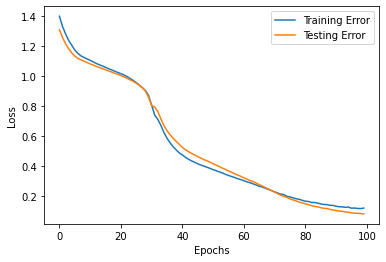

In [27]:
#Plot Loss
import matplotlib.pyplot as plt
plt.plot(train_history.epoch,train_history.history["loss"],label="Training Error")
plt.plot(train_history.epoch,train_history.history["val_loss"],label="Testing Error")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Accuraccy vs epochs

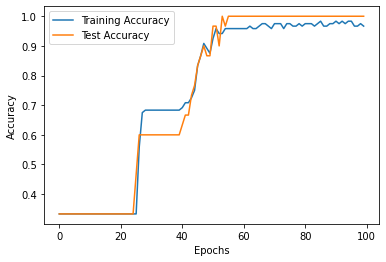

In [28]:
#Accuraccy
plt.plot(train_history.epoch,train_history.history["accuracy"],label="Training Accuracy")

plt.plot(train_history.epoch,train_history.history["val_accuracy"],label="Test Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# basic activation what i had used

In [30]:
def custom_activation(x):
    return max(x,k+(k1*x)) 

In [34]:
custom_activation(-543)

-37.71000000000001